In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Read the Pokemon data from the Excel file
df = pd.read_excel('pokemon_data.xlsx')
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic","{'num': '002', 'name': 'Ivysaur'}, {'num': '00...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic","{'num': '003', 'name': 'Venusaur'}","{'num': '001', 'name': 'Bulbasaur'}"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"{'num': '001', 'name': 'Bulbasaur'}, {'num': '..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock","{'num': '005', 'name': 'Charmeleon'}, {'num': ...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock","{'num': '006', 'name': 'Charizard'}","{'num': '004', 'name': 'Charmander'}"


In [30]:
# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df['spawn_chance'] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5[['name', 'spawn_chance']])

Pokemons with spawn rate less than 5%:
           name  spawn_chance
0     Bulbasaur        0.6900
1       Ivysaur        0.0420
2      Venusaur        0.0170
3    Charmander        0.2530
4    Charmeleon        0.0120
..          ...           ...
146     Dratini        0.3000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[147 rows x 2 columns]


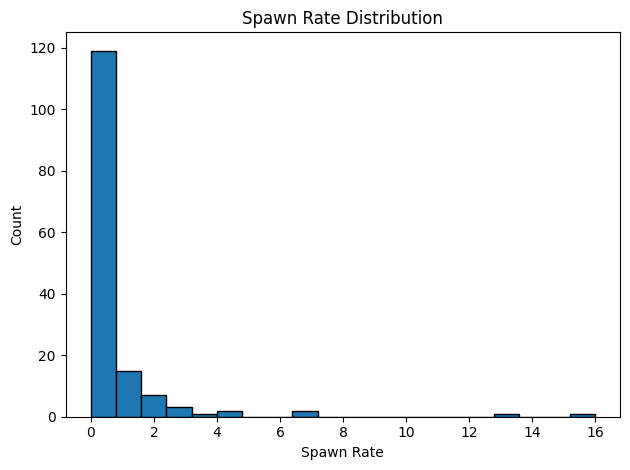

In [31]:
# Plot 1: Spawn Rate Distribution
plt.hist(df['spawn_chance'], bins=20, edgecolor='black')
plt.xlabel('Spawn Rate')
plt.ylabel('Count')
plt.title('Spawn Rate Distribution')
plt.tight_layout()
plt.show()

In [32]:
# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df['weaknesses'].str.count(',') < 3]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses[['name', 'weaknesses']])

Pokemons with less than 4 weaknesses:
           name             weaknesses
3    Charmander    Water, Ground, Rock
4    Charmeleon    Water, Ground, Rock
5     Charizard  Water, Electric, Rock
6      Squirtle        Electric, Grass
7     Wartortle        Electric, Grass
..          ...                    ...
145     Moltres  Water, Electric, Rock
146     Dratini     Ice, Dragon, Fairy
147   Dragonair     Ice, Dragon, Fairy
149      Mewtwo       Bug, Ghost, Dark
150         Mew       Bug, Ghost, Dark

[102 rows x 2 columns]


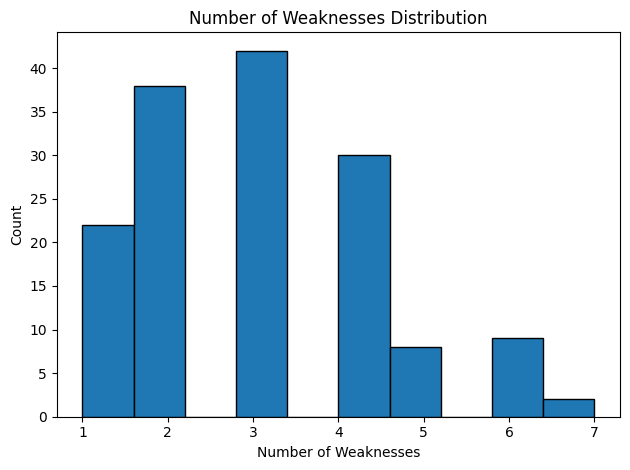

In [33]:
# Plot 2: Number of Weaknesses Distribution
plt.hist(df['weaknesses'].str.count(',') + 1, bins=10, edgecolor='black')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Count')
plt.title('Number of Weaknesses Distribution')
plt.tight_layout()
plt.show()

In [34]:
# Get all Pokemons that have no multipliers at all
no_multipliers = df[df['multipliers'].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers[['name', 'multipliers']])

Pokemons with no multipliers:
           name multipliers
2      Venusaur         NaN
5     Charizard         NaN
8     Blastoise         NaN
11   Butterfree         NaN
14     Beedrill         NaN
..          ...         ...
144      Zapdos         NaN
145     Moltres         NaN
148   Dragonite         NaN
149      Mewtwo         NaN
150         Mew         NaN

[81 rows x 2 columns]


In [35]:
# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df['next_evolution'].str.count(',') < 2]
print("Pokemons with less than 2 evolutions:")
print(less_than_2_evolutions[['name', 'next_evolution']])

Pokemons with less than 2 evolutions:
           name                        next_evolution
1       Ivysaur    {'num': '003', 'name': 'Venusaur'}
4    Charmeleon   {'num': '006', 'name': 'Charizard'}
7     Wartortle   {'num': '009', 'name': 'Blastoise'}
10      Metapod  {'num': '012', 'name': 'Butterfree'}
13       Kakuna    {'num': '015', 'name': 'Beedrill'}
16    Pidgeotto     {'num': '018', 'name': 'Pidgeot'}
18      Rattata    {'num': '020', 'name': 'Raticate'}
20      Spearow      {'num': '022', 'name': 'Fearow'}
22        Ekans       {'num': '024', 'name': 'Arbok'}
24      Pikachu      {'num': '026', 'name': 'Raichu'}
26    Sandshrew   {'num': '028', 'name': 'Sandslash'}
29     Nidorina   {'num': '031', 'name': 'Nidoqueen'}
32     Nidorino    {'num': '034', 'name': 'Nidoking'}
34     Clefairy    {'num': '036', 'name': 'Clefable'}
36       Vulpix   {'num': '038', 'name': 'Ninetales'}
38   Jigglypuff  {'num': '040', 'name': 'Wigglytuff'}
40        Zubat      {'num': '042', 'name': 

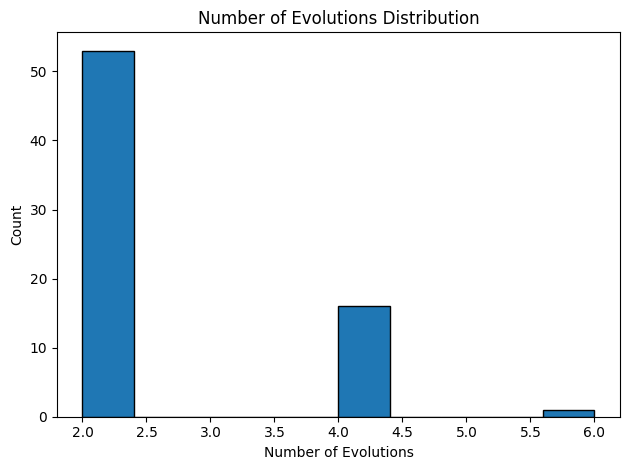

In [36]:
# Plot 3: Evolution Count Distribution
plt.hist(df['next_evolution'].str.count(',') + 1, bins=10, edgecolor='black')
plt.xlabel('Number of Evolutions')
plt.ylabel('Count')
plt.title('Number of Evolutions Distribution')
plt.tight_layout()
plt.show()

In [46]:
# Extract minutes and seconds from spawn_time
df['spawn_minutes'] = df['spawn_time'].dt.minute
df['spawn_seconds'] = df['spawn_time'].dt.second

# Calculate total seconds from spawn_minutes and spawn_seconds
df['spawn_total_seconds'] = df['spawn_minutes'] * 60 + df['spawn_seconds']

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = df[df['spawn_total_seconds'] < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300[['name', 'spawn_time']])

Pokemons with spawn time less than 300 seconds:
          name          spawn_time
6     Squirtle 1900-01-01 00:04:25
8    Blastoise 1900-01-01 00:00:06
10     Metapod 1900-01-01 00:02:11
12      Weedle 1900-01-01 00:02:21
13      Kakuna 1900-01-01 00:02:30
..         ...                 ...
127     Tauros 1900-01-01 00:00:37
129   Gyarados 1900-01-01 00:02:15
134    Jolteon 1900-01-01 00:02:30
136    Porygon 1900-01-01 00:02:49
139     Kabuto 1900-01-01 00:00:05

[75 rows x 2 columns]


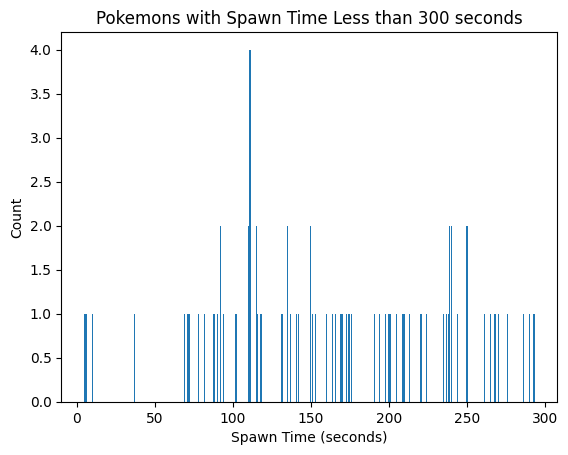

In [49]:
# Create a bar plot of spawn time ranges
spawn_time_counts = spawn_time_less_than_300['spawn_total_seconds'].value_counts().sort_index()
plt.bar(spawn_time_counts.index, spawn_time_counts.values)
plt.xlabel('Spawn Time (seconds)')
plt.ylabel('Count')
plt.title('Pokemons with Spawn Time Less than 300 seconds')
plt.show()

In [44]:
# Get all Pokemon who have more than two types of capabilities
df['num_types'] = df['type'].str.count(',') + 1
more_than_2_types = df[df['num_types'] > 2]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types[['name', 'type']])

Pokemons with more than two types of capabilities:
Empty DataFrame
Columns: [name, type]
Index: []


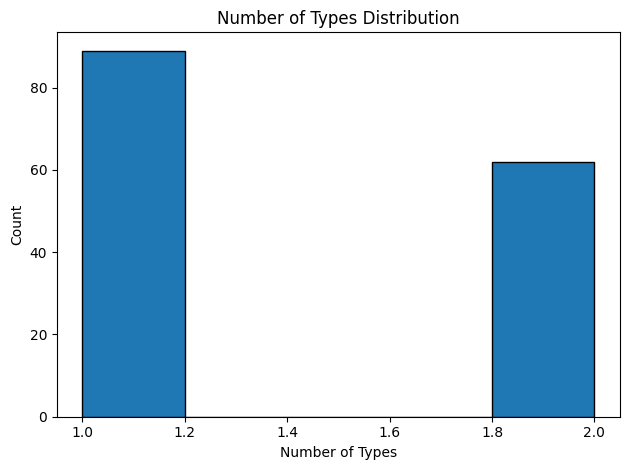

In [45]:
# Plot 5: Number of Types Distribution
plt.hist(df['num_types'], bins=5, edgecolor='black')
plt.xlabel('Number of Types')
plt.ylabel('Count')
plt.title('Number of Types Distribution')
plt.tight_layout()
plt.show()